In [1]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from utils.plot_utils import set_fontsize
from utils.hdf_utils import load_measurement_data_devices
from utils.binning_utils import *

In [2]:
fname = "2020_9_25.hdf"
dset_names = ["1601063722 Q1 check",
              "1601064820 R0 F1 check",
              "1601065055 R0 F2 check",
              "1601065636 rot_cooling_laser_only"]
devices = ('Laser Lock', 'Wavelength', 'ZaberTMM')

In [3]:
pmt_channel = 1
device_data = {}
pxie_data = {}
for dset_name in dset_names:
    pxie, pxie_time, data_devices = load_measurement_data_devices(fname, dset_name, devices)
    device_data[dset_name] = data_devices
    pxie_data[dset_name] = [dat[:,pmt_channel] for dat in pxie.values()]

# Q1 line

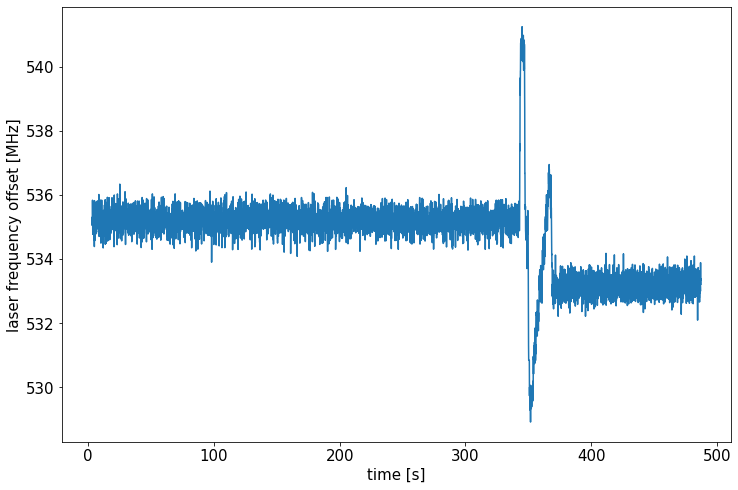

In [4]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(device_data['1601063722 Q1 check']['Laser Lock']['time'],
        device_data['1601063722 Q1 check']['Laser Lock']['laser 2 frequency'])

ax.set_xlabel('time [s]')
ax.set_ylabel('laser frequency offset [MHz]')
set_fontsize(ax, 15)

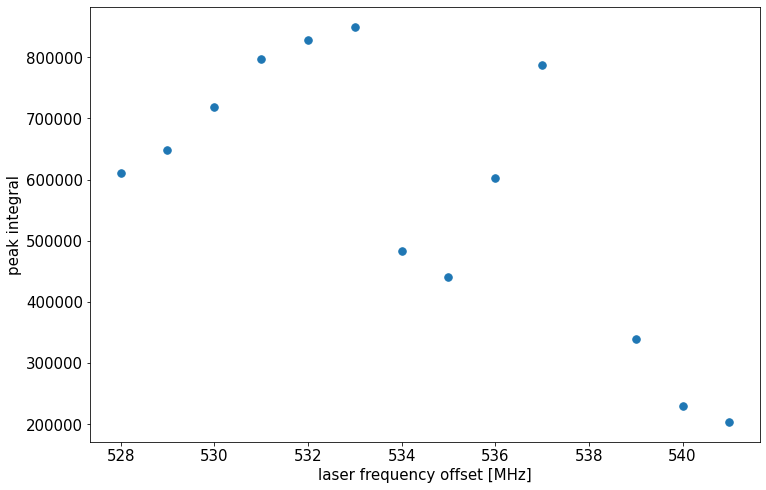

In [5]:
binned_data = bin_datasets_laserscan(fname, dset_names[:1], ['Q1 scan'], ch = 1, laser_scanned = 'laser 2')
x = list(binned_data['Q1 scan'].keys())
y = [val[0] for val in binned_data['Q1 scan'].values()]
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x,y, '.', ms = 15)

ax.set_xlabel('laser frequency offset [MHz]')
ax.set_ylabel('peak integral')

set_fontsize(ax, 15)

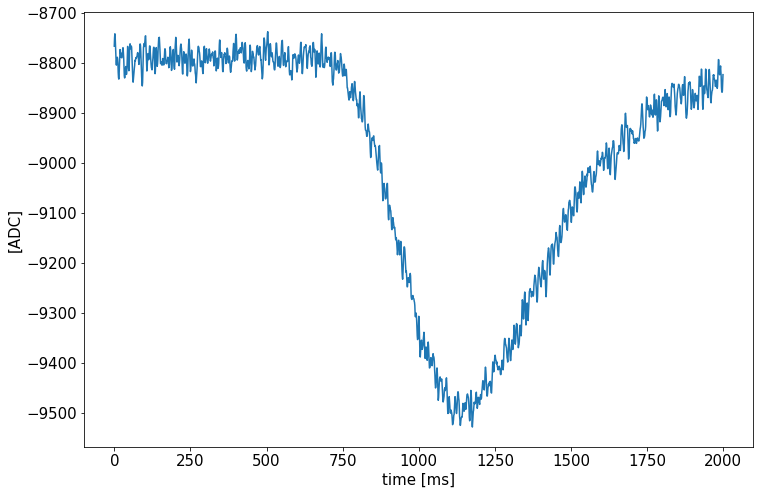

In [6]:
idx_start = 2400
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(np.mean(pxie_data[dset_names[0]][idx_start:], axis = 0))

ax.set_ylabel("[ADC]")
ax.set_xlabel('time [ms]')

set_fontsize(ax, 15)

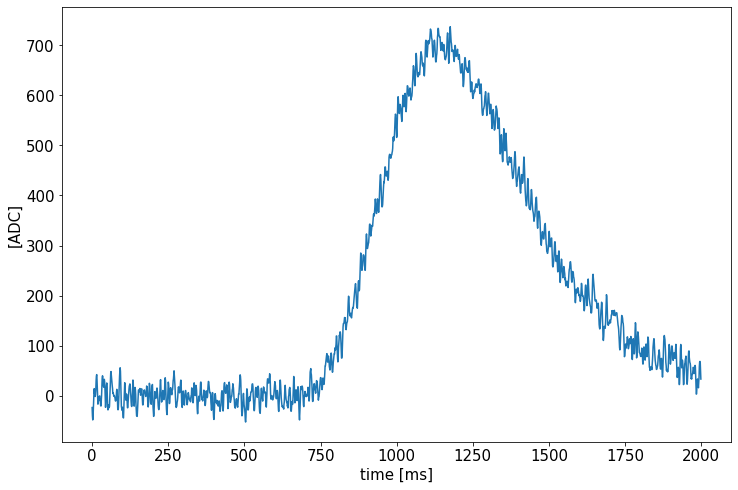

In [7]:
idx_start = 2400

y = np.mean(pxie_data[dset_names[0]][idx_start:], axis = 0)
y -= y[:250].mean()
y *= -1

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(y)

ax.set_ylabel("[ADC]")
ax.set_xlabel('time [ms]')

set_fontsize(ax, 15)

### Biggest signal

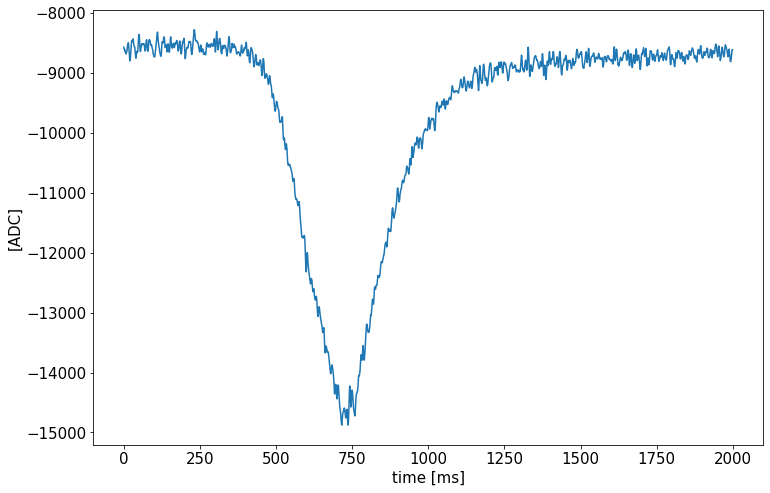

In [8]:
trace = 0
ptp = 0
for idx, tr in enumerate(pxie_data[dset_names[0]]):
    if np.ptp(tr) > ptp:
        trace = tr
        ptp = np.ptp(tr)
        
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(trace)

ax.set_ylabel("[ADC]")
ax.set_xlabel('time [ms]')

set_fontsize(ax, 15)

# R0 F1 Line

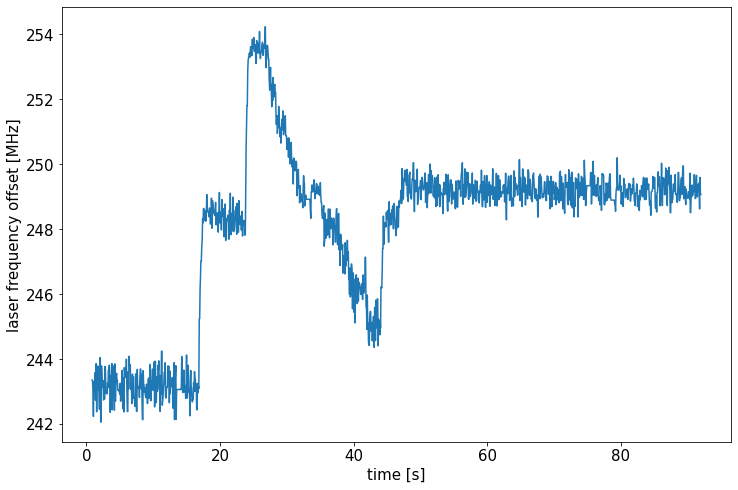

In [9]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(device_data[dset_names[1]]['Laser Lock']['time'],
        device_data[dset_names[1]]['Laser Lock']['laser 2 frequency'])

ax.set_xlabel('time [s]')
ax.set_ylabel('laser frequency offset [MHz]')
set_fontsize(ax, 15)

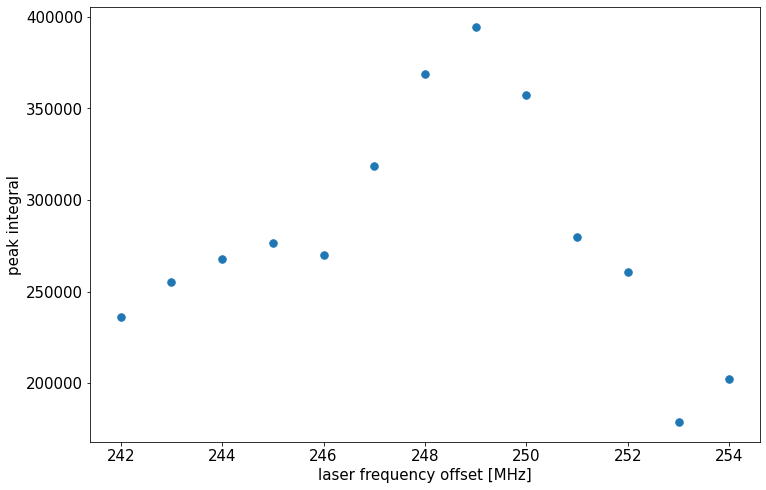

In [10]:
binned_data = bin_datasets_laserscan(fname, [dset_names[1]], ['R0 F1 scan'], ch = 1, laser_scanned = 'laser 2')
x = list(binned_data['R0 F1 scan'].keys())
y = [val[0] for val in binned_data['R0 F1 scan'].values()]
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x,y, '.', ms = 15)

ax.set_xlabel('laser frequency offset [MHz]')
ax.set_ylabel('peak integral')

set_fontsize(ax, 15)

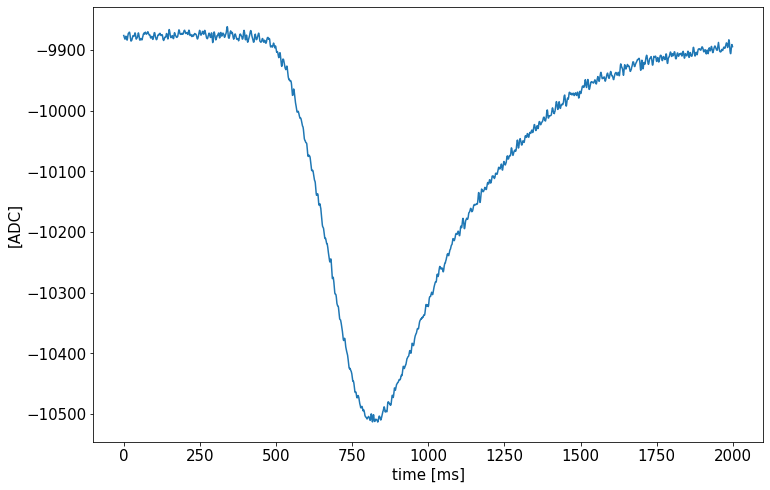

In [11]:
idx_start = 0
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(np.mean(pxie_data[dset_names[1]][idx_start:], axis = 0))

ax.set_ylabel("[ADC]")
ax.set_xlabel('time [ms]')

set_fontsize(ax, 15)

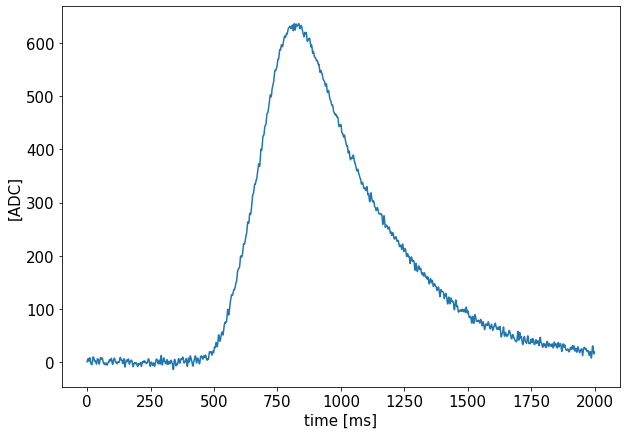

In [12]:
idx_start = 0

y = np.mean(pxie_data[dset_names[1]][idx_start:], axis = 0)
y -= y[:250].mean()
y *= -1

fig, ax = plt.subplots(figsize = (10,7))
ax.plot(y)

ax.set_ylabel("[ADC]")
ax.set_xlabel('time [ms]')

set_fontsize(ax, 15)

### Biggest Signal

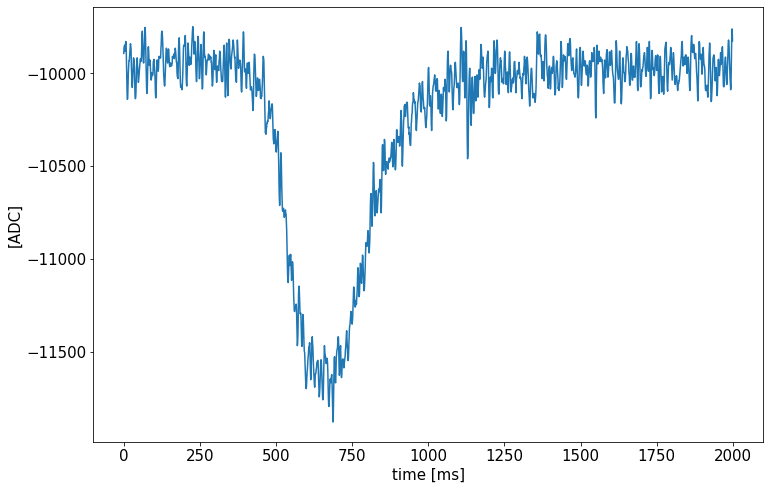

In [13]:
trace = 0
ptp = 0
for idx, tr in enumerate(pxie_data[dset_names[1]]):
    if np.ptp(tr) > ptp:
        trace = tr
        ptp = np.ptp(tr)
        
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(trace)

ax.set_ylabel("[ADC]")
ax.set_xlabel('time [ms]')

set_fontsize(ax, 15)

# R0 F2 Line

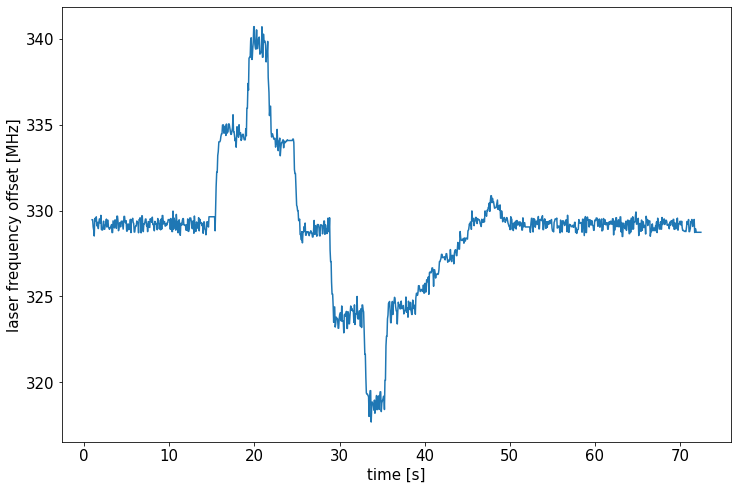

In [14]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(device_data[dset_names[2]]['Laser Lock']['time'],
        device_data[dset_names[2]]['Laser Lock']['laser 2 frequency'])

ax.set_xlabel('time [s]')
ax.set_ylabel('laser frequency offset [MHz]')
set_fontsize(ax, 15)

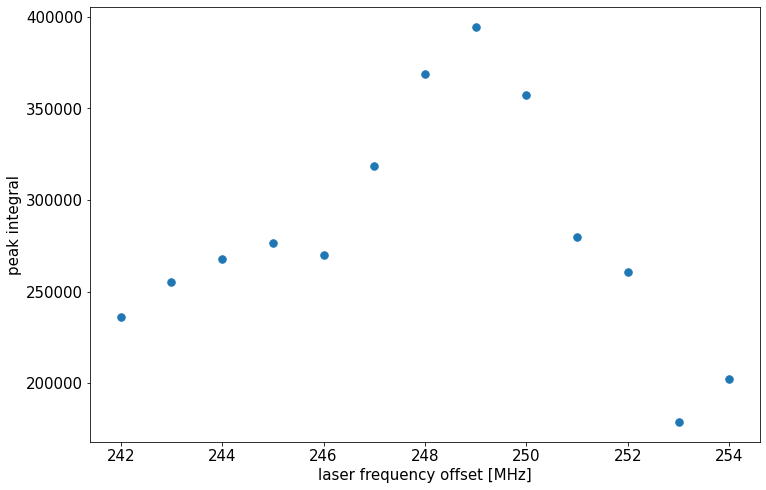

In [15]:
binned_data = bin_datasets_laserscan(fname, [dset_names[1]], ['R0 F2 scan'], ch = 1, laser_scanned = 'laser 2')
x = list(binned_data['R0 F2 scan'].keys())
y = [val[0] for val in binned_data['R0 F2 scan'].values()]
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x,y, '.', ms = 15)

ax.set_xlabel('laser frequency offset [MHz]')
ax.set_ylabel('peak integral')

set_fontsize(ax, 15)

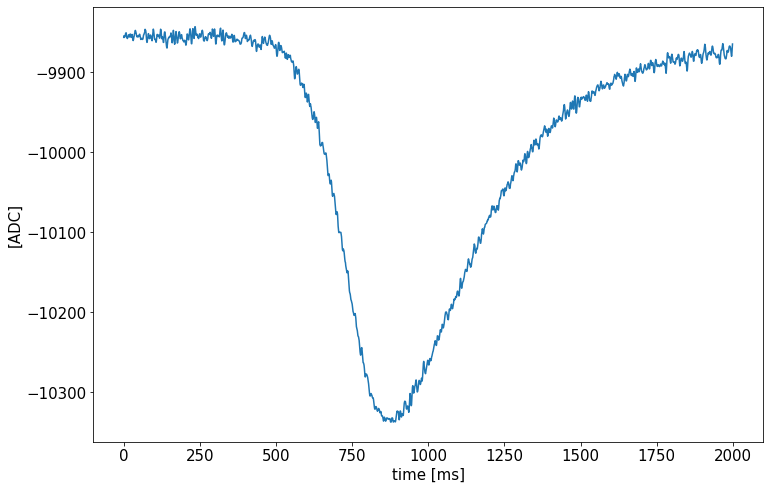

In [16]:
idx_start = 0
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(np.mean(pxie_data[dset_names[2]][idx_start:], axis = 0))

ax.set_ylabel("[ADC]")
ax.set_xlabel('time [ms]')

set_fontsize(ax, 15)

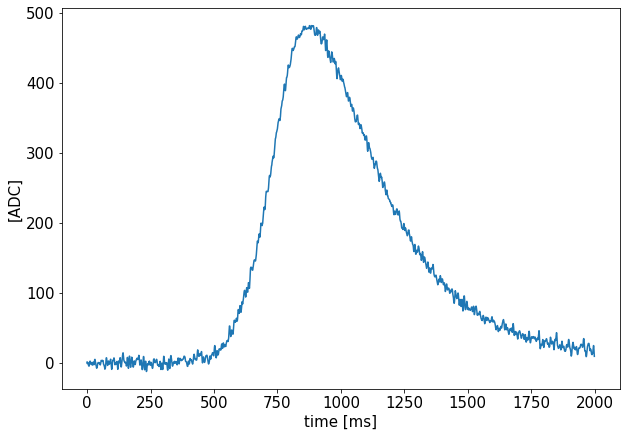

In [17]:
idx_start = 0

y = np.mean(pxie_data[dset_names[2]][idx_start:], axis = 0)
y -= y[:250].mean()
y *= -1

fig, ax = plt.subplots(figsize = (10,7))
ax.plot(y)

ax.set_ylabel("[ADC]")
ax.set_xlabel('time [ms]')

set_fontsize(ax, 15)

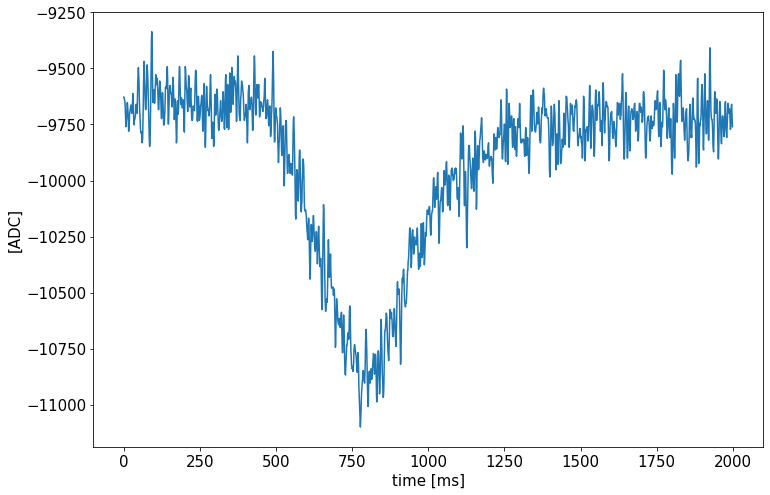

In [18]:
trace = 0
ptp = 0
for idx, tr in enumerate(pxie_data[dset_names[2]]):
    if np.ptp(tr) > ptp:
        trace = tr
        ptp = np.ptp(tr)
        
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(trace)

ax.set_ylabel("[ADC]")
ax.set_xlabel('time [ms]')

set_fontsize(ax, 15)

# Rotational Cooling Scan

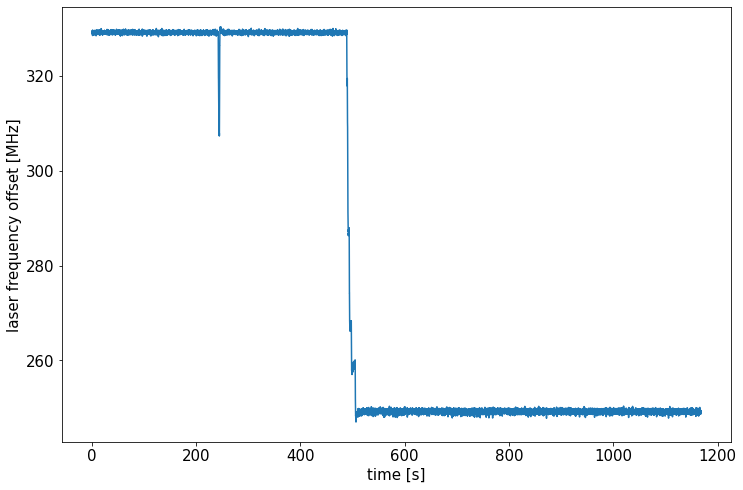

In [19]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(device_data[dset_names[3]]['Laser Lock']['time'],
        device_data[dset_names[3]]['Laser Lock']['laser 2 frequency'])

ax.set_xlabel('time [s]')
ax.set_ylabel('laser frequency offset [MHz]')
set_fontsize(ax, 15)

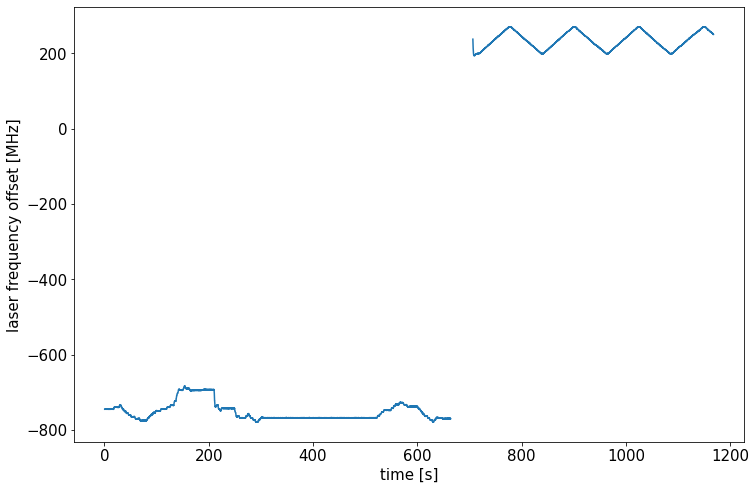

In [20]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(device_data[dset_names[3]]['Laser Lock']['time'],
        device_data[dset_names[3]]['Laser Lock']['laser 1 frequency'])

ax.set_xlabel('time [s]')
ax.set_ylabel('laser frequency offset [MHz]')
set_fontsize(ax, 15)

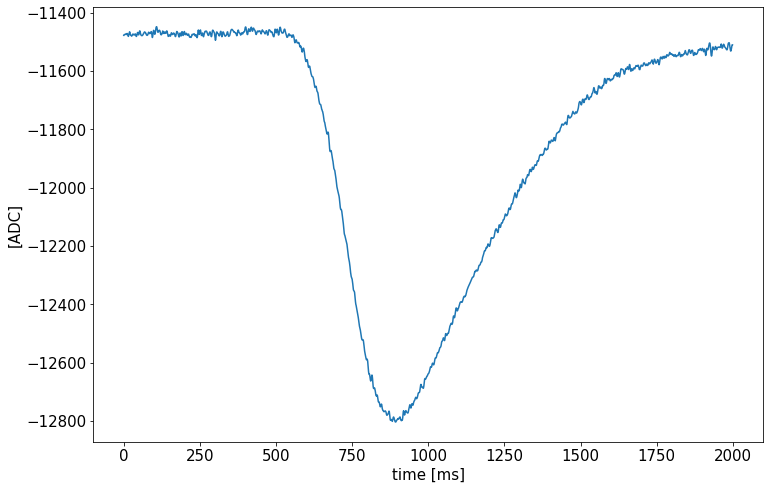

In [21]:
idx_start = 5600
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(np.mean(pxie_data[dset_names[3]][idx_start:], axis = 0))

ax.set_ylabel("[ADC]")
ax.set_xlabel('time [ms]')

set_fontsize(ax, 15)

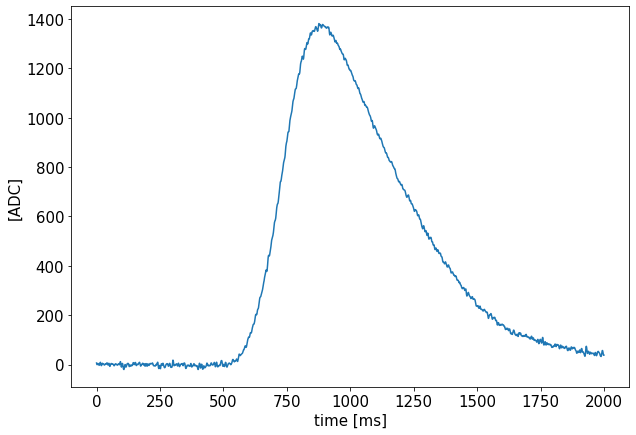

In [22]:
idx_start = -300

y = np.mean(pxie_data[dset_names[3]][idx_start:], axis = 0)
y -= y[:250].mean()
y *= -1

fig, ax = plt.subplots(figsize = (10,7))
ax.plot(y)

ax.set_ylabel("[ADC]")
ax.set_xlabel('time [ms]')

set_fontsize(ax, 15)

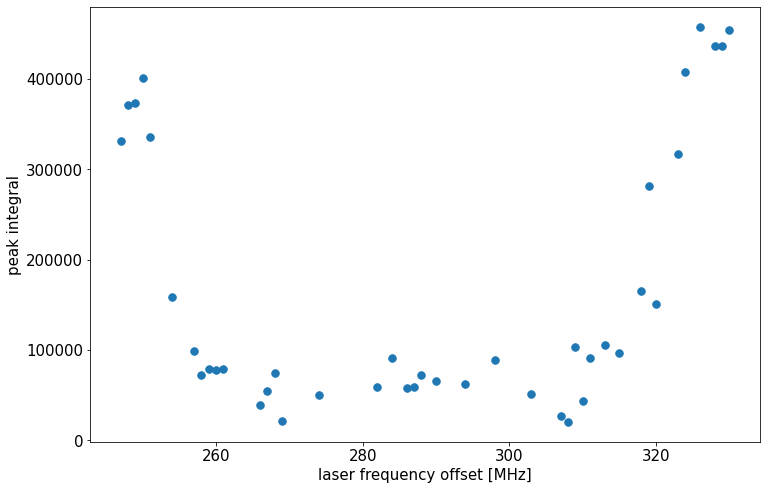

In [23]:
binned_data = bin_datasets_laserscan(fname, [dset_names[3]], ['rot scan'], ch = 1, laser_scanned = 'laser 2')
x = list(binned_data['rot scan'].keys())
y = [val[0] for val in binned_data['rot scan'].values()]
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x,y, '.', ms = 15)

ax.set_xlabel('laser frequency offset [MHz]')
ax.set_ylabel('peak integral')

set_fontsize(ax, 15)